<a href="https://colab.research.google.com/github/srimoyeeegangz/ML-lab-codes/blob/main/14)_vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
updated_vehicle=files.upload()


Saving vehicles.csv to vehicles.csv


In [ ]:
import pandas as pd

vehicles_df = pd.read_csv('vehicles.csv')
print(vehicles_df.head())  # preview first 5 rows


                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [ ]:
print(vehicles_df.isnull().sum())


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [ ]:
print(vehicles_df.dtypes)

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object


In [ ]:

categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']

vehicles_encoded = pd.get_dummies(vehicles_df, columns=categorical_cols)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns after encoding, dropping any missing values
X = vehicles_encoded.drop(columns=['name'])  # drop name or other non-numeric columns if present
X = X.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns after encoding, dropping any missing values
X = vehicles_encoded.drop(columns=['name'])
X = X.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:

import numpy as np

if X_scaled.shape[0] > 500:
    np.random.seed(42)
    sampled_indices = np.random.choice(X_scaled.shape[0], size=500, replace=False)
    X_sampled = X_scaled[sampled_indices]
else:
    X_sampled = X_scaled


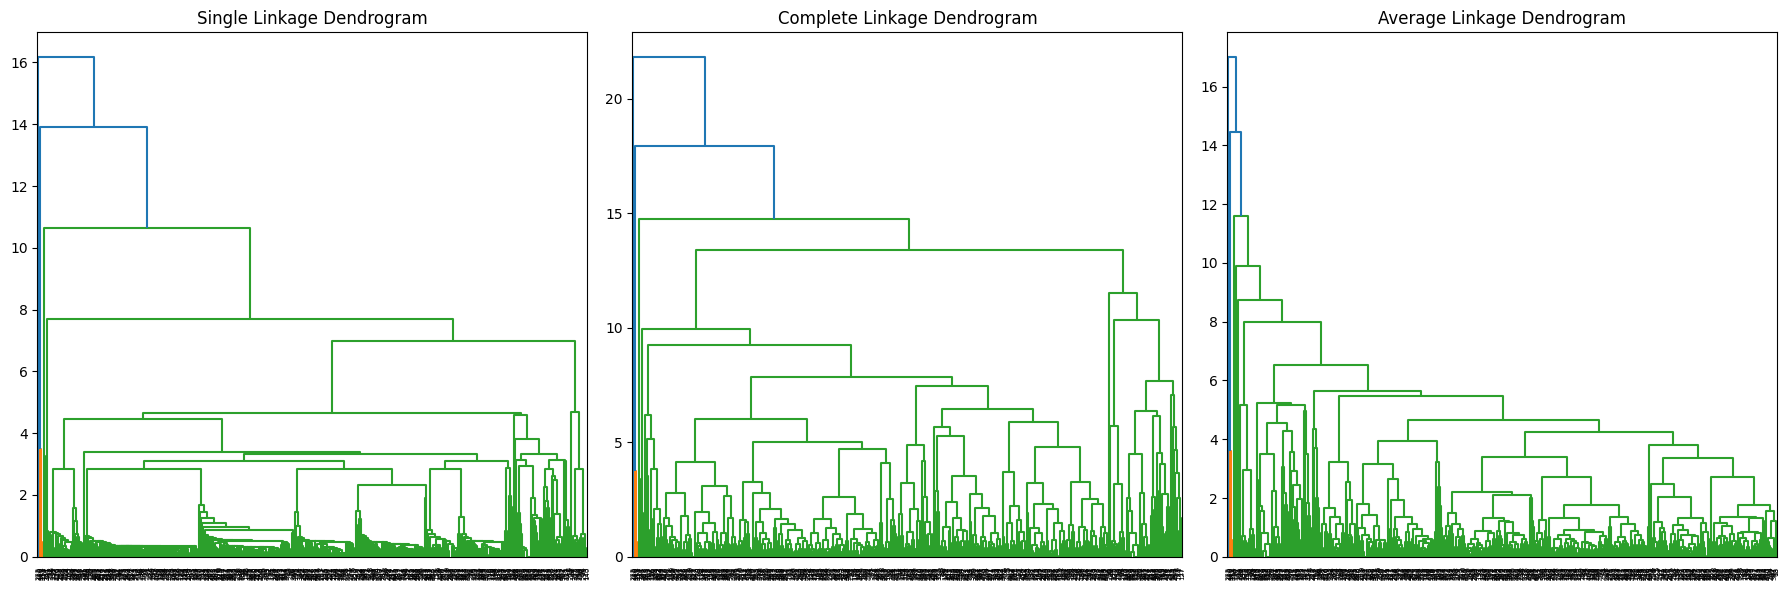

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

if X_scaled.shape[0] > 500:
    np.random.seed(42)
    sampled_indices = np.random.choice(X_scaled.shape[0], size=500, replace=False)
    X_sampled = X_scaled[sampled_indices]
else:
    X_sampled = X_scaled

linkage_methods = ['single', 'complete', 'average']

plt.figure(figsize=(18, 6))
for i, method in enumerate(linkage_methods, 1):
    linked = linkage(X_sampled, method=method)
    plt.subplot(1, 3, i)
    dendrogram(linked)
    plt.title(f'{method.capitalize()} Linkage Dendrogram')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

for method in linkage_methods:
    agg = AgglomerativeClustering(n_clusters=5, linkage=method)
    labels = agg.fit_predict(X_scaled)
    print(f'{method.capitalize()} linkage cluster labels (first 10): {labels[:10]}')


Single linkage cluster labels (first 10): [4 4 4 4 4 4 4 4 4 1]
Complete linkage cluster labels (first 10): [0 0 0 0 0 0 0 0 0 0]
Average linkage cluster labels (first 10): [0 0 0 0 0 0 0 0 0 0]
